# TSNE

In [1]:
! pip install --quiet --upgrade nltk > /dev/null

In [2]:
import nltk

nltk.download("all", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)

True

In [39]:
import pandas as pd
import os
import csv
import nltk
import string

# Identify the working directory and data files
working_directory = "./47-TSNE-KMeans-DBSCAN-MacBook"

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [4]:
df = pd.read_pickle("./21-Preprocess-Combined-Data-v2/dataframe.pickle")

In [5]:
verification_row = 9

In [6]:
# make a tag for this run
import datetime

TAG = f"{datetime.datetime.now():%Y_%m_%d_%s}"

In [7]:
scores = {}

In [8]:
df.shape

(5736, 20)

In [9]:
df.head()

ROW_ID                                           FOI_TEXT   
0  1969025  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...  \
1  1426265  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...   
2  2609625  IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...   
3  2813837  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...   
4  1337517  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...   

  DEVICE_PROBLEM_CODE             DEVICE_PROBLEM_TEXT   
0                3283  Wireless Communication Problem  \
1                3283  Wireless Communication Problem   
2                1435                No Device Output   
3                3283  Wireless Communication Problem   
4                3283  Wireless Communication Problem   

                 GENERIC_NAME DEVICE_REPORT_PRODUCT_CODE          UDI-DI   
0  CONTINUOUS GLUCOSE MONITOR                        QBJ                  \
1  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   
2  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   
3  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   
4  CONTINUOUS GLUCOSE MONITOR                        QBJ  00386270000385   

       UDI-PUBLIC DATE_OF_EVENT REPORTER_OCCUPATION_CODE REPORT_DATE   
0                    07/30/2020                      000              \
1  00386270000385    06/05/2020                      000               
2  00386270000385    10/05/2020                      000               
3  00386270000385    10/23/2020                      000               
4  00386270000385    05/25/2020                      000               

  EVENT_LOCATION SOURCE_TYPE   
0              I    CONSUMER  \
1              I    CONSUMER   
2              I    CONSUMER   
3              I    CONSUMER   
4              I    CONSUMER   

                                      TOKENIZED_TEXT   
0  [it, was, reported, that, the, transmitter, lo...  \
1  [it, was, reported, that, signal, loss, over, ...   
2  [it, was, reported, that, transmitter, failed,...   
3  [it, was, reported, that, signal, loss, over, ...   
4  [it, was, reported, that, signal, loss, over, ...   

                                        NOPUNCT_TEXT   
0  [it, was, reported, that, the, transmitter, lo...  \
1  [it, was, reported, that, signal, loss, over, ...   
2  [it, was, reported, that, transmitter, failed,...   
3  [it, was, reported, that, signal, loss, over, ...   
4  [it, was, reported, that, signal, loss, over, ...   

                                    NOSTOPWORDS_TEXT   
0  [reported, transmitter, lost, connection, pump...  \
1  [reported, signal, loss, one, hour, occurred, ...   
2  [reported, transmitter, failed, error, occurre...   
3  [reported, signal, loss, one, hour, occurred, ...   
4  [reported, signal, loss, one, hour, occurred, ...   

                                       NODIGITS_TEXT   
0  [reported, transmitter, lost, connection, pump...  \
1  [reported, signal, loss, one, hour, occurred, ...   
2  [reported, transmitter, failed, error, occurre...   
3  [reported, signal, loss, one, hour, occurred, ...   
4  [reported, signal, loss, one, hour, occurred, ...   

                                            POS_TEXT   
0  [(reported, VBN), (transmitter, NN), (lost, VB...  \
1  [(reported, VBN), (signal, JJ), (loss, NN), (o...   
2  [(reported, VBN), (transmitter, NN), (failed, ...   
3  [(reported, VBN), (signal, JJ), (loss, NN), (o...   
4  [(reported, VBN), (signal, JJ), (loss, NN), (o...   

                                     LEMMATIZED_TEXT   
0  [report, transmitter, lose, connection, pump, ...  \
1  [report, signal, loss, one, hour, occur, produ...   
2  [report, transmitter, fail, error, occur, data...   
3  [report, signal, loss, one, hour, occur, revie...   
4  [report, signal, loss, one, hour, occur, produ...   

                                        STEMMED_TEXT  
0  [report, transmitt, lost, connect, pump, great...  
1  [report, signal, loss, one, hour, occur, produ...  


In [10]:
import nltk



In [11]:
# create a DataFrame for the sentences
sentences_df = pd.DataFrame(
    columns=[
        "SENTENCE_ID",
        "SENTENCE",
        "ROW_ID",
        "FOI_TEXT",
        "DEVICE_PROBLEM_CODE",
        "DEVICE_PROBLEM_TEXT",
    ]
)

# Iterate over every row in the FOI_TEXT DataFrame
# and create a new dataframe with a row for each sentence.
# Each row will have a sentence, the orginal ROW_ID, and the
# FOI_TEXT that it came from along with the DEVICE_PROBLEM_CODE and
# DEVICE_PROBLEM_TEXT from the orginal FOI_TEXT
sentence_counter = 0

for index, row in df.iterrows():
    for sentence in nltk.sent_tokenize(row["FOI_TEXT"]):
        sentence_data = {
            "SENTENCE": sentence,
            "SENTENCE_ID": sentence_counter,
            "ROW_ID": row["ROW_ID"],
            "FOI_TEXT": row["FOI_TEXT"],
            "DEVICE_PROBLEM_CODE": row["DEVICE_PROBLEM_CODE"],
            "DEVICE_PROBLEM_TEXT": row["DEVICE_PROBLEM_TEXT"],
        }
        sentence_data_df = pd.DataFrame(sentence_data, index=[sentence_counter])
        sentences_df = pd.concat([sentences_df, sentence_data_df])
        sentence_counter = sentence_counter + 1

In [12]:
sentences_df.shape

(25686, 6)

In [13]:
sentences_df.head()

SENTENCE_ID                                           SENTENCE   ROW_ID   
0           0  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...  1969025  \
1           1  THE TRANSMITTER ULTIMATELY REGAINED CONNECTION...  1969025   
2           2  NO ADDITIONAL PATIENT OR EVENT INFORMATION WAS...  1969025   
3           3  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...  1426265   
4           4    NO PRODUCT OR DATA WAS PROVIDED FOR EVALUATION.  1426265   

                                            FOI_TEXT DEVICE_PROBLEM_CODE   
0  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...                3283  \
1  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...                3283   
2  IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...                3283   
3  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...                3283   
4  IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...                3283   

              DEVICE_PROBLEM_TEXT  
0  Wireless Communication Problem  
1  Wireless Communication Problem  
2  Wireless Communication Problem  
3  Wireless Communication Problem  
4  Wireless Communication Problem

In [14]:
sentences_df["SENTENCE"][verification_row]

'THE PROBABLE CAUSE COULD NOT BE DETERMINED.'

In [15]:
# Process the sentences
import re
import nltk
import string

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)


def process_sentence(sentence):
    # Lowercase the sentence
    sentence = sentence.lower()

    # Remove any words that start with a digit
    sentence = re.sub(r"\b\d\w*\b", "", sentence)

    # Remove punctuation
    sentence_tokens = sentence.split()
    sentence_tokens = [
        token.translate(str.maketrans("", "", string.punctuation))
        for token in sentence_tokens
    ]

    # Remove stopwords
    sentence_tokens = [token for token in sentence_tokens if token not in stop_words]
    sentence = " ".join(sentence_tokens)

    return sentence


sentences_df["PROCESSED_SENTENCE"] = sentences_df["SENTENCE"].apply(process_sentence)

In [16]:
sentences_df["PROCESSED_SENTENCE"][verification_row]

'probable cause could determined'

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

In [18]:
%pip install --upgrade --quiet sentence-transformers hdbscan mpld3 sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sentence_transformers import SentenceTransformer

# define the document embedding model
# https://www.sbert.net/docs/pretrained_models.html
embedder = SentenceTransformer("all-MiniLM-L6-v2")
embedded_sentences = embedder.encode(sentences_df["PROCESSED_SENTENCE"])
embedded_sentences

array([[ 0.00797196,  0.06402367,  0.01412312, ...,  0.01263442,
        -0.0927747 , -0.04012575],
       [-0.02872899,  0.01099845,  0.0145125 , ...,  0.03422186,
        -0.02442272, -0.04160523],
       [ 0.00838429,  0.05963192, -0.03641192, ...,  0.03092053,
        -0.00812466, -0.00493952],
       ...,
       [-0.06312982,  0.09404119, -0.02415265, ..., -0.01254776,
         0.10541871,  0.04489084],
       [ 0.00619845, -0.013316  ,  0.0515376 , ..., -0.06092132,
         0.0018618 , -0.06808808],
       [ 0.03530982,  0.0642552 ,  0.06098982, ..., -0.06081245,
         0.06142467,  0.04099736]], dtype=float32)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# "np.array([i for i in df['EMBED']])" Converts the data into a 2d array
embedded_sentences_scaled = scaler.fit_transform(
    np.array([i for i in embedded_sentences])
)

In [21]:
embedded_sentences_scaled

array([[0.5719787 , 0.6762023 , 0.48890775, ..., 0.55340767, 0.36013076,
        0.40519148],
       [0.41584435, 0.4543546 , 0.49014112, ..., 0.6189094 , 0.5331781 ,
        0.40002674],
       [0.57373285, 0.65782803, 0.32883412, ..., 0.6088924 , 0.57444006,
        0.5280243 ],
       ...,
       [0.2694953 , 0.80179006, 0.3676663 , ..., 0.4769985 , 0.86189884,
        0.7019789 ],
       [0.56443375, 0.3526275 , 0.607421  , ..., 0.33022088, 0.59972286,
        0.30757684],
       [0.6882802 , 0.677171  , 0.63736165, ..., 0.3305512 , 0.75051874,
        0.688387  ]], dtype=float32)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the sentences using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized_sentences = vectorizer.fit_transform(sentences_df["PROCESSED_SENTENCE"])
vectorized_sentences

<25686x1050 sparse matrix of type '<class 'numpy.float64'>'
	with 134036 stored elements in Compressed Sparse Row format>

In [23]:
# Combine the embeddings and vectorized sentences into a single feature matrix
feature_matrix = pd.concat(
    [
        pd.DataFrame(embedded_sentences_scaled),
        pd.DataFrame(vectorized_sentences.toarray()),
    ],
    axis=1,
)

In [24]:
feature_matrix.shape

(25686, 1434)

In [25]:
# importing libraries to use
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [33]:
# creating t-SNE object
tsne = TSNE(n_components=3, random_state=42)

# fitting t-SNE to standardized data
tsne_result = tsne.fit_transform(feature_matrix)

In [45]:
tsne_result.shape

(25686, 3)

In [34]:
# Add the tSNE results to the sentences data frame
sentences_df[["x", "y", "z"]] = tsne_result.tolist()

# tSNE DBSCAN Clustering

In [35]:
dbscan = DBSCAN(eps=0.31, min_samples=4)
dbscan_labels = dbscan.fit_predict(tsne_results)

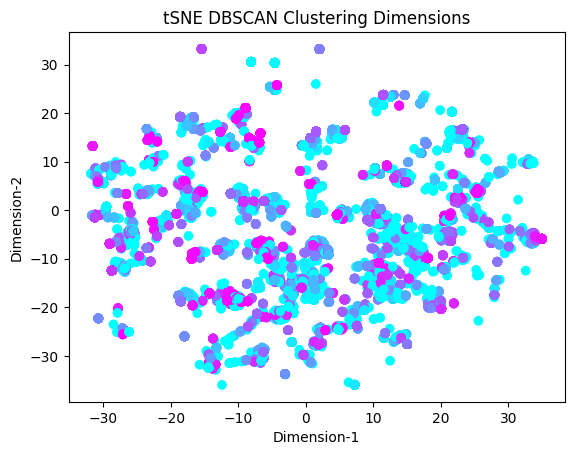

In [36]:
# Plot t-SNE visualization with  DBSCAN labels
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap="cool")
plt.title("tSNE DBSCAN Clustering Dimensions")
plt.xlabel("Dimension-1")
plt.ylabel("Dimension-2")
plt.show()

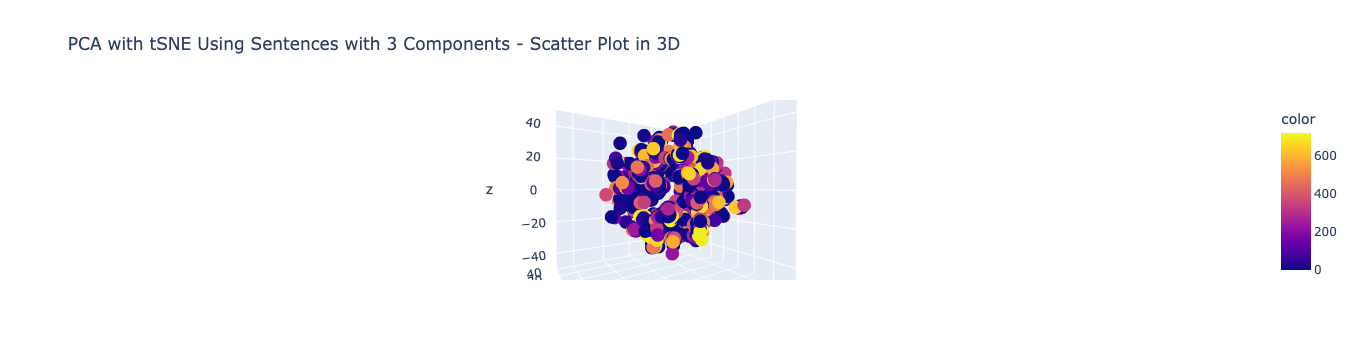

In [41]:
import plotly.express as px

fig_3d = px.scatter_3d(
    sentences_df,
    x="x",
    y="y",
    z="z",
    color=dbscan_labels,
    #color_continuous_scale=colorscale,
    custom_data=["SENTENCE_ID", "DEVICE_PROBLEM_TEXT"],
    title=f"PCA with tSNE Using Sentences with 3 Components - Scatter Plot in 3D",
)

# https://stackoverflow.com/questions/59057881/python-plotly-how-to-customize-hover-template-on-with-what-information-to-show
fig_3d.update_traces(
    hovertemplate="<br>".join(
        [
            "x: %{x}",
            "y: %{y}",
            "z: %{z}",
            "Color: %{marker.color}",
            "SENTENCE_ID: %{customdata[0]}",
            "TEXT: %{customdata[1]}",
        ]
    )
)

# This limits the axis ranges to remove outliers
fig_3d.update_layout(
    scene=dict(
        xaxis=dict(range=[-40, 40]),
        yaxis=dict(range=[-50, 50]),
        zaxis=dict(range=[-50, 50]),
    )
)

# write the 3d scatter plot to a file in the working directory
fig_3d.write_html(
    f"{working_directory}/pca_tsne_3d_plot_with_3_components_{TAG}.html"
)

# Show the plot
fig_3d.show()

In [42]:
dbscan_clusters_number = np.unique(dbscan_labels)
print("Number of clusters found by dbscan {}".format(len(dbscan_clusters_number)))

Number of clusters found by dbscan 726
